In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

font_manager.fontManager.addfont('thsarabunnew.ttf')
rc('font', family=['TH Sarabun New', 'DejaVu Sans'], size=14)

In [2]:
data = pd.read_csv("./lab_data/L10_data.csv")

In [23]:
def cal_beta(Ib, Ic):
    return Ic/Ib

def convert_unit(Ic):
    return Ic*1e3

for row in data.iterrows():
    data.loc[row[0], "β"] = cal_beta(row[1]["Ib [A]"], row[1]["Ic [A]"])
    data.loc[row[0], "Ib [mA]"] = convert_unit(row[1]["Ib [A]"])
    data.loc[row[0], "Ic [mA]"] = convert_unit(row[1]["Ic [A]"])

data.head()

,V2 [V],Ib [A],Ic [A],Vbe [V],Vbc [V],Vce [V],β,Ib [mA],Ic [mA]
0,0.2,0.000784,0.00183,0.716,0.700,0.0166,2.334184,0.784,1.83
1,0.4,0.000776,0.00375,0.724,0.699,0.0249,4.832474,0.776,3.75
2,0.6,0.000770,0.00568,0.730,0.698,0.0316,7.376623,0.770,5.68
3,0.8,0.000765,0.00763,0.735,0.697,0.0373,9.973856,0.765,7.63
4,1.0,0.000761,0.00958,0.739,0.697,0.0422,12.588699,0.761,9.58


Text(0.5, 0, 'V2 [V]')

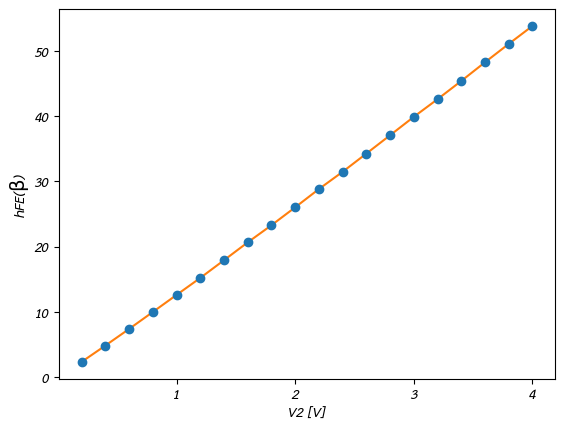

In [25]:
x = data["V2 [V]"]
y = data["β"]
plt.plot(x, y, marker="o", markerfacecolor="#1f77b4", markeredgecolor="#1f77b4", color="#ff7f0e")
plt.ylabel("hFE(β)")
plt.xlabel("V2 [V]")

Text(0, 0.5, 'Ib [mA]')

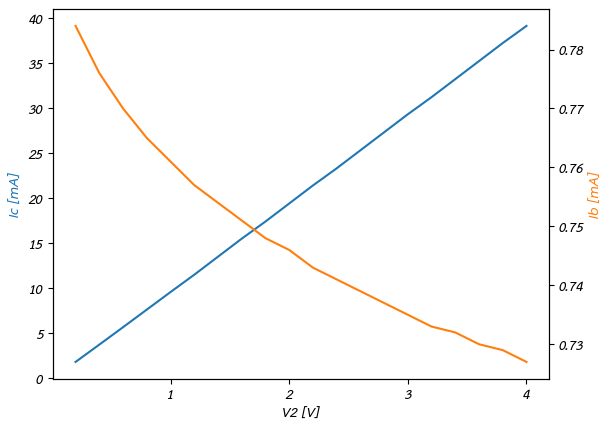

In [26]:
ax1 = plt.subplot()
x = data["V2 [V]"]
y = data["Ic [mA]"]
ax1.plot(x, y)
ax1.set_xlabel("V2 [V]")
ax1.set_ylabel("Ic [mA]", color="#1f77b4")
y = data["Ib [mA]"]
ax2 = ax1.twinx()
ax2.plot(x, y, color="#ff7f0e")
ax2.set_ylabel("Ib [mA]", color="#ff7f0e")

Text(0.5, 0, 'V2 [V]')

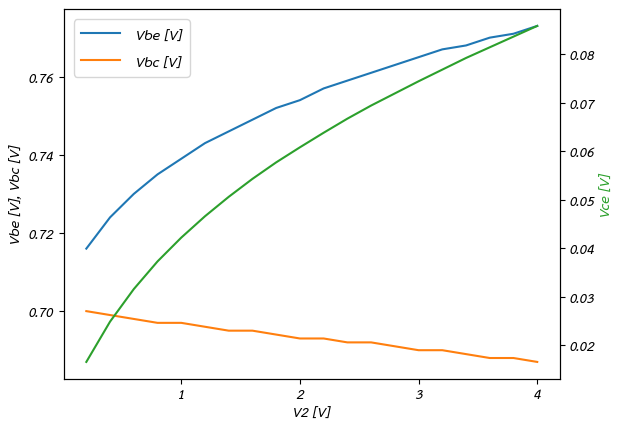

In [41]:
ax1 = plt.subplot()
x = data["V2 [V]"]
y = data["Vbe [V]"]
ax1.plot(x, y)
y = data["Vbc [V]"]
ax1.plot(x, y)
ax1.set_ylabel("Vbe [V], Vbc [V]")
ax1.legend(["Vbe [V]", "Vbc [V]"])
y = data["Vce [V]"]
ax2 = ax1.twinx()
ax2.plot(x, y, color="#2ca02c")
ax2.set_ylabel("Vce [V]", color="#2ca02c")
ax1.set_xlabel("V2 [V]")